
Processing: misfit-1.jpg
Percentage of Thresholded Pixels (Adaptive Gaussian): 95.77%


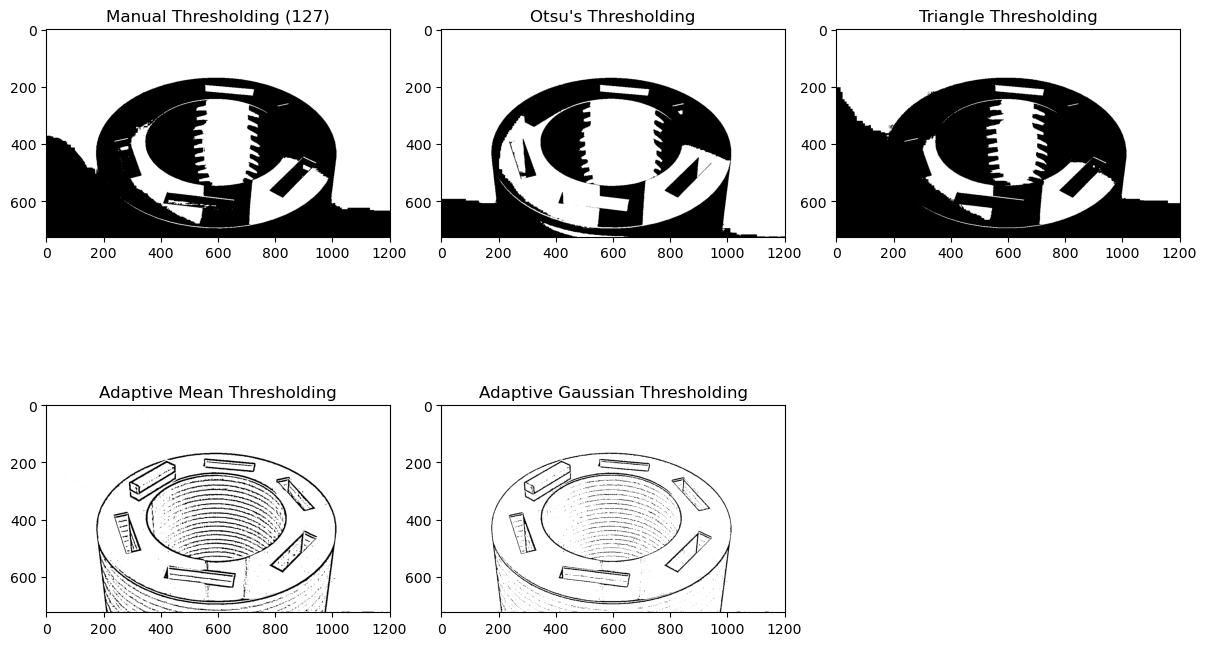

Otsu's Threshold Value: 114.0000
Triangle Threshold Value: 131.0000
Structural Similarity Index (SSIM): 0.8701
Threshold for SSIM classification: 0.8701
Current SSIM Threshold for misfit-1.jpg: 0.8701
Surface Roughness (Std Dev): 17.8853
Linear Correlation (Pearson): 0.5976
Non-linear Correlation (Spearman): 0.7191
Magnet Insertion Percentage: 1.45%
Alignment Score: 87.01%
Decision: Assembly issue detected (low SSIM and magnet not fully inserted).


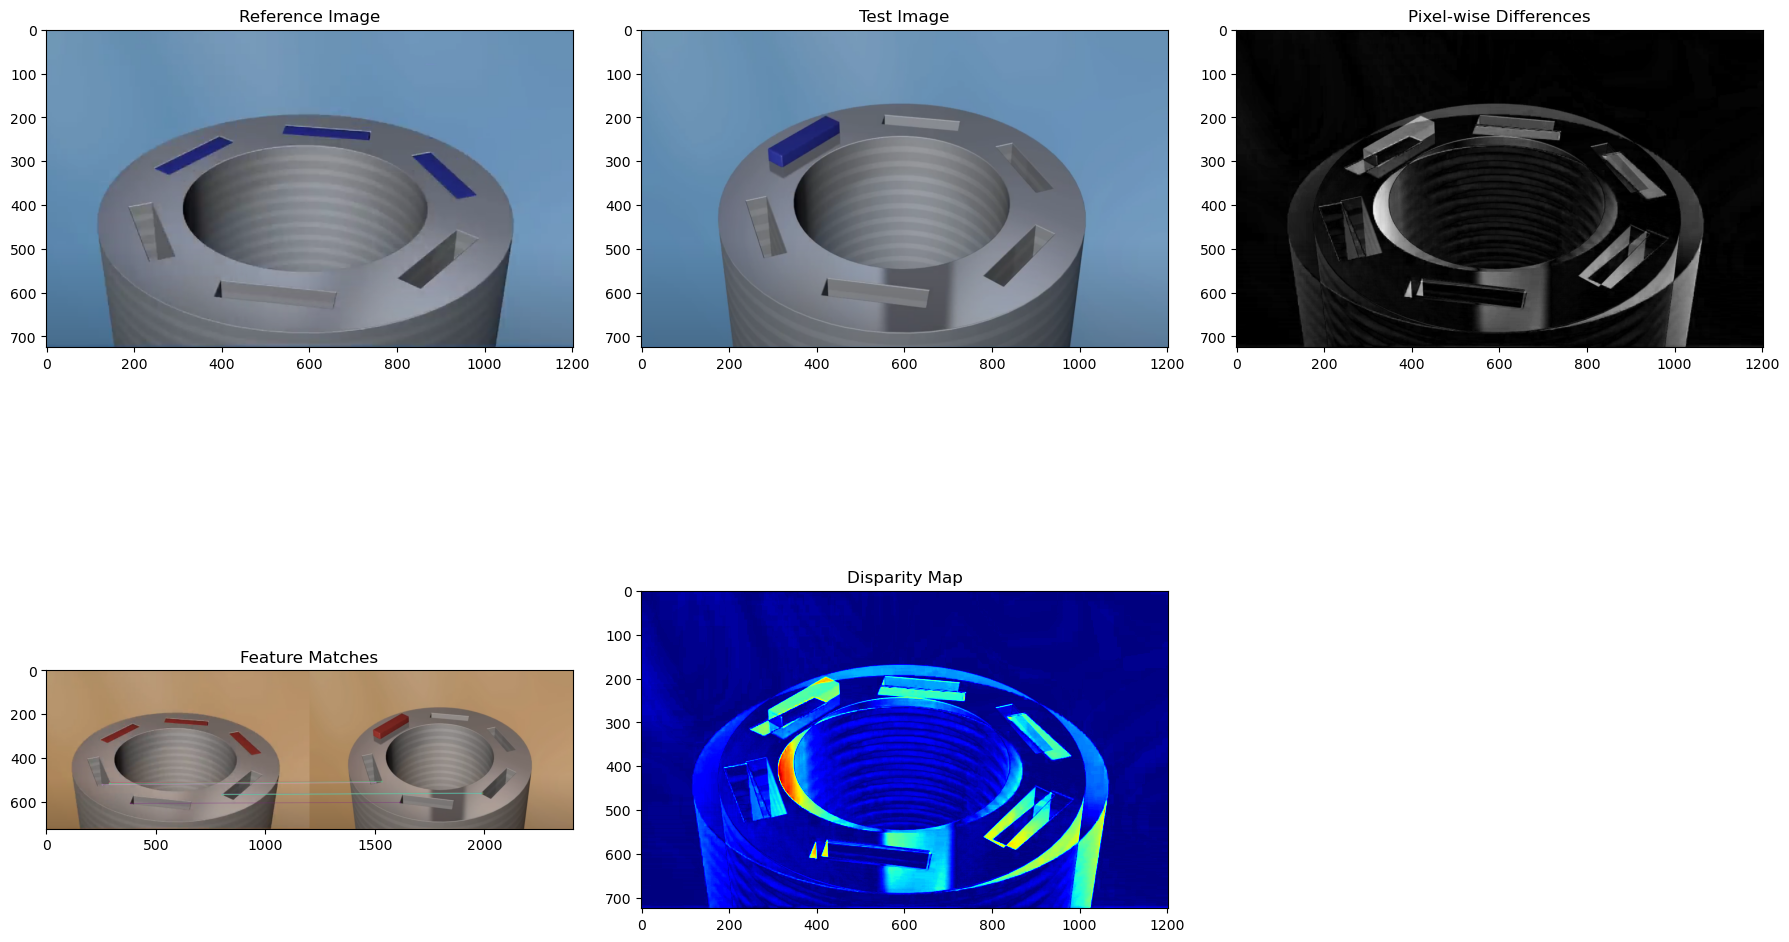


Processing: misfit-2_1.jpg
Percentage of Thresholded Pixels (Adaptive Gaussian): 95.56%


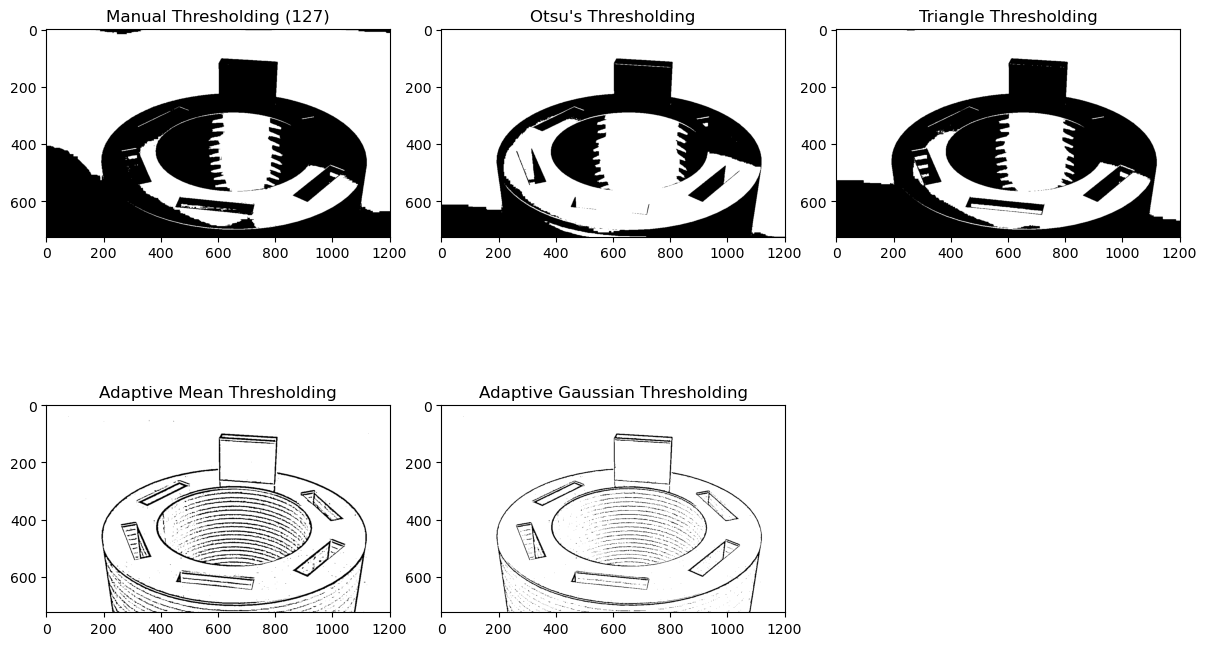

Otsu's Threshold Value: 113.0000
Triangle Threshold Value: 123.0000
Structural Similarity Index (SSIM): 0.8608
Threshold for SSIM classification: 0.8701
Current SSIM Threshold for misfit-2_1.jpg: 0.8701
Surface Roughness (Std Dev): 20.1010
Linear Correlation (Pearson): 0.4312
Non-linear Correlation (Spearman): 0.5780
Magnet Insertion Percentage: 1.44%
Alignment Score: 86.08%
Decision: Assembly issue detected (low SSIM and magnet not fully inserted).


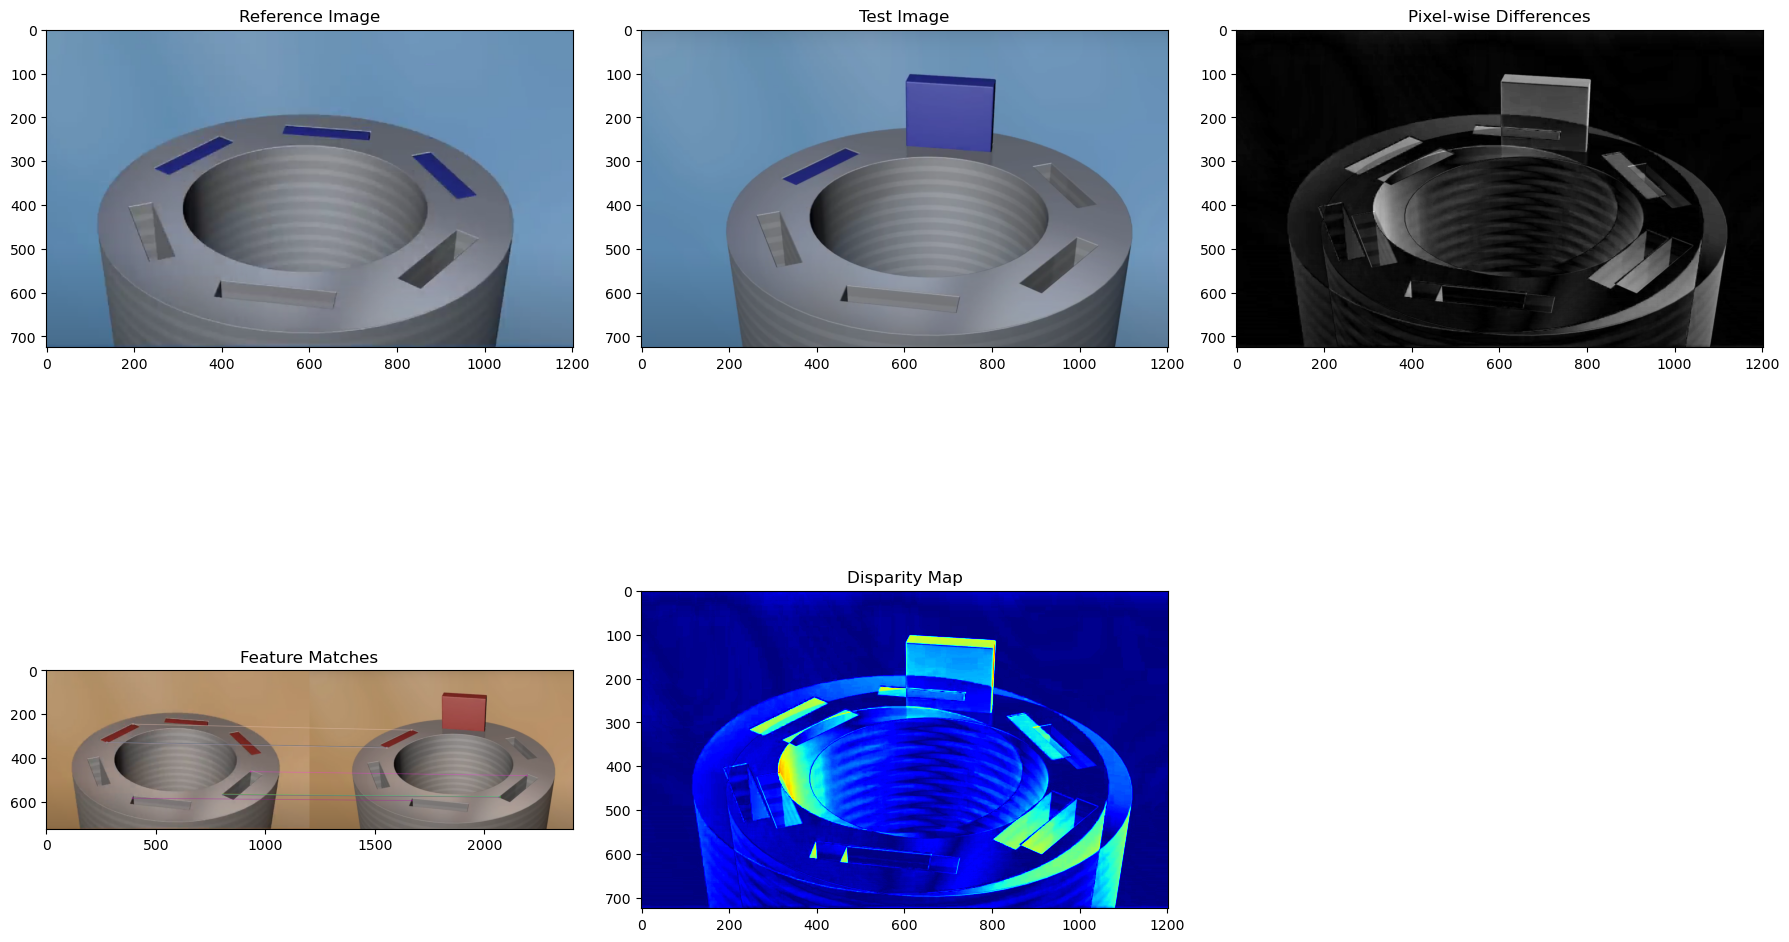


Processing: misfit-2_2.png
Percentage of Thresholded Pixels (Adaptive Gaussian): 95.38%


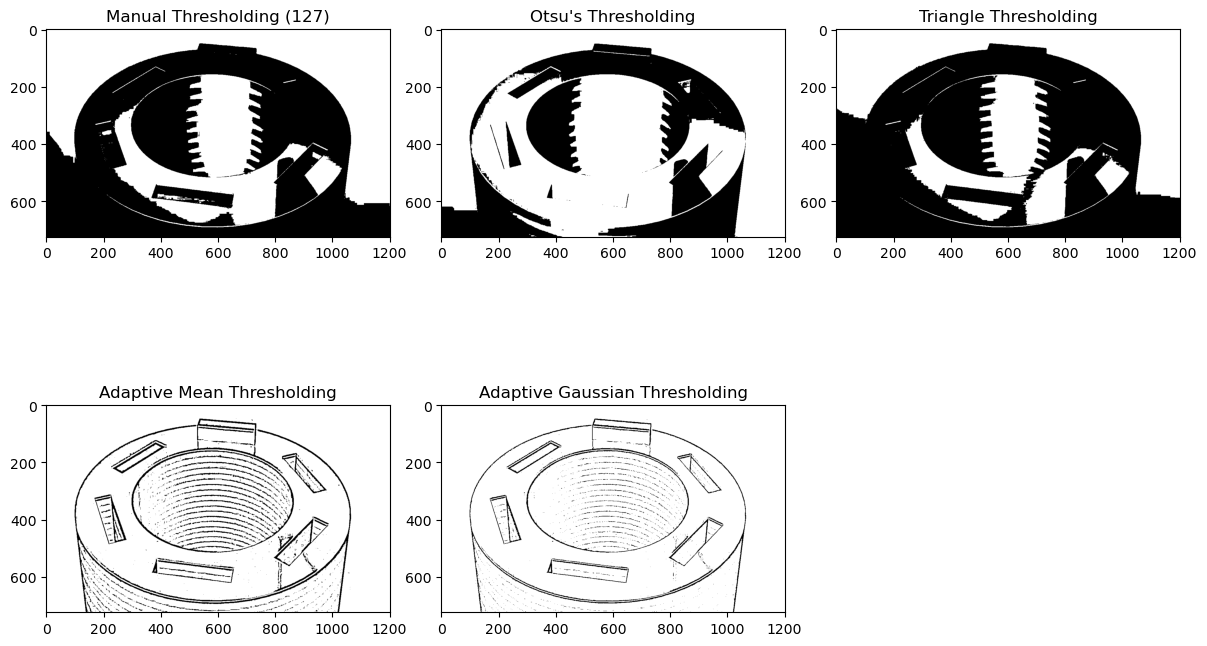

Otsu's Threshold Value: 110.0000
Triangle Threshold Value: 130.0000
Structural Similarity Index (SSIM): 0.8539
Threshold for SSIM classification: 0.8682
Current SSIM Threshold for misfit-2_2.png: 0.8682
Surface Roughness (Std Dev): 21.0387
Linear Correlation (Pearson): 0.4494
Non-linear Correlation (Spearman): 0.5019
Magnet Insertion Percentage: 1.93%
Alignment Score: 85.39%
Decision: Assembly issue detected (low SSIM and magnet not fully inserted).


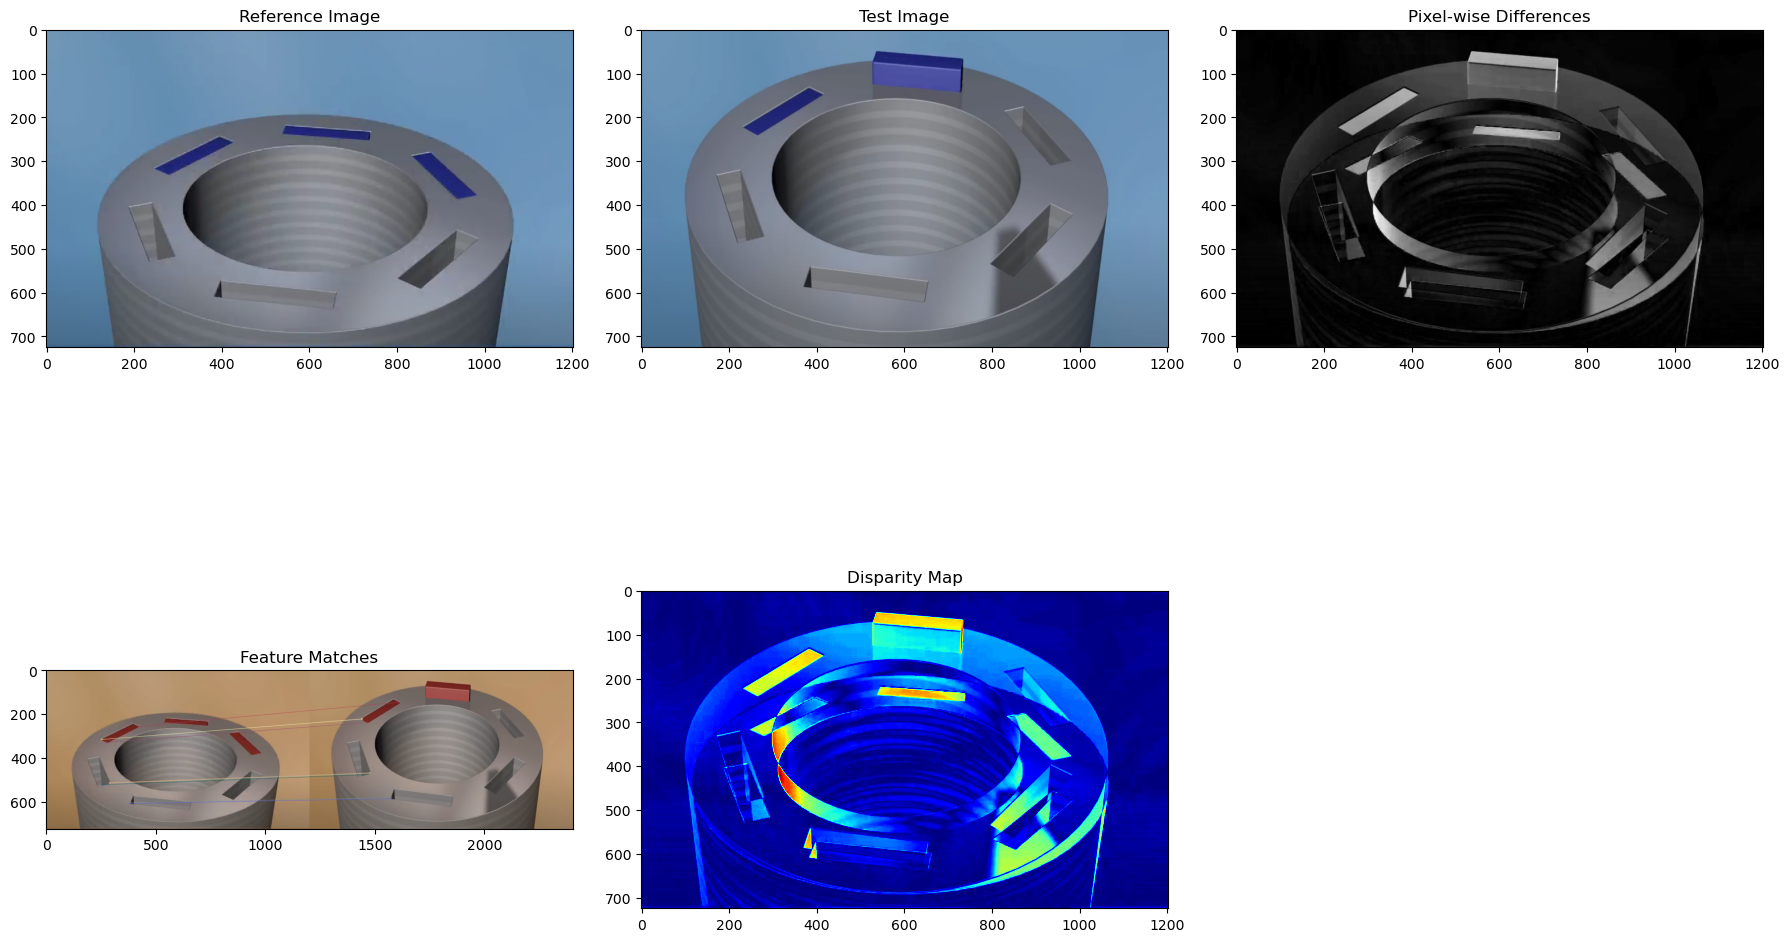


Processing: misfit-2_3.jpg
Percentage of Thresholded Pixels (Adaptive Gaussian): 95.58%


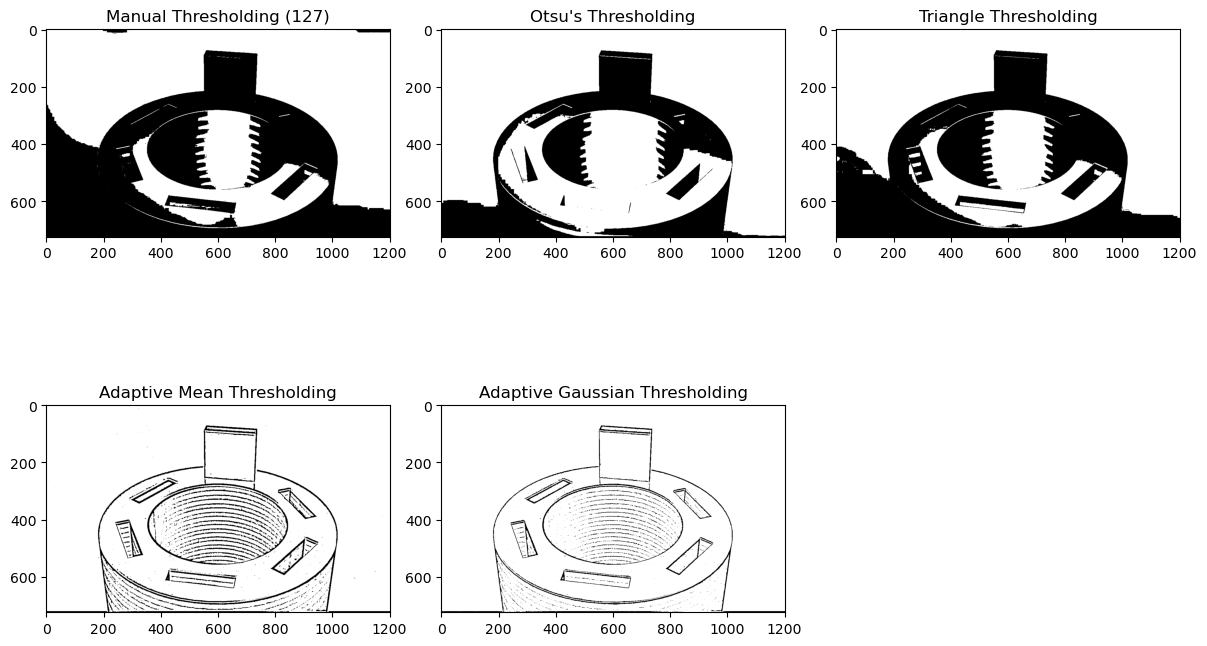

Otsu's Threshold Value: 112.0000
Triangle Threshold Value: 123.0000
Structural Similarity Index (SSIM): 0.8708
Threshold for SSIM classification: 0.8709
Current SSIM Threshold for misfit-2_3.jpg: 0.8709
Surface Roughness (Std Dev): 17.6178
Linear Correlation (Pearson): 0.5861
Non-linear Correlation (Spearman): 0.7384
Magnet Insertion Percentage: 1.29%
Alignment Score: 87.08%
Decision: Assembly issue detected (low SSIM and magnet not fully inserted).


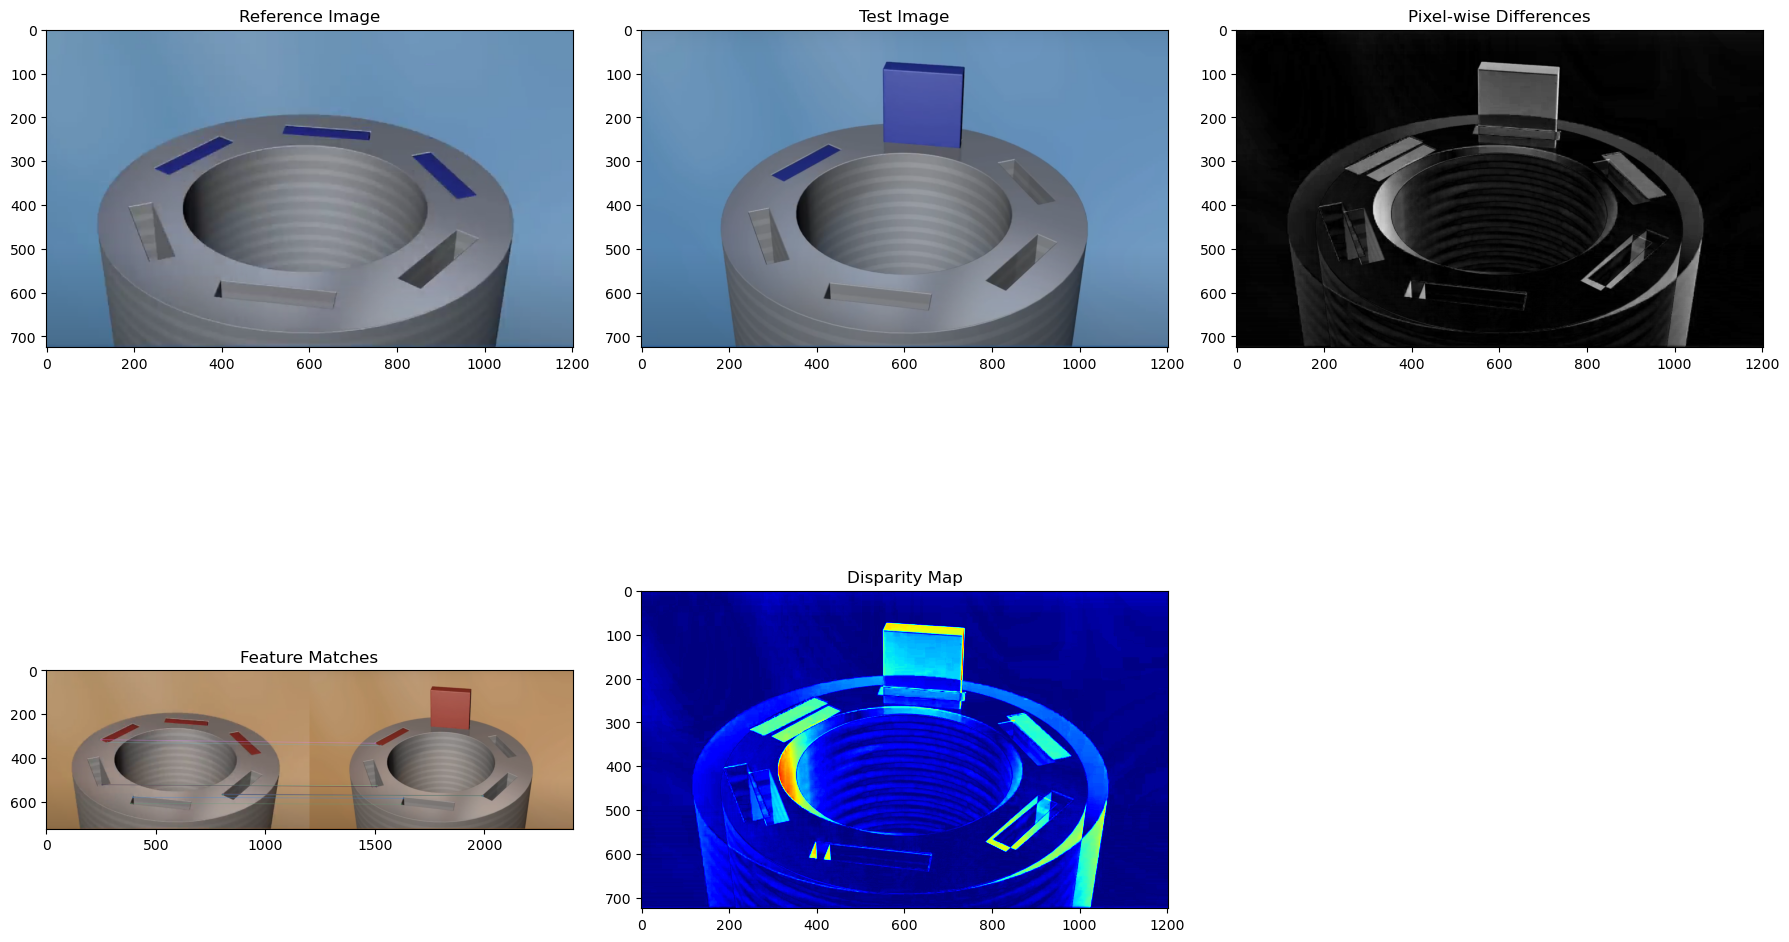


Processing: misfit-3_1.png
Percentage of Thresholded Pixels (Adaptive Gaussian): 95.54%


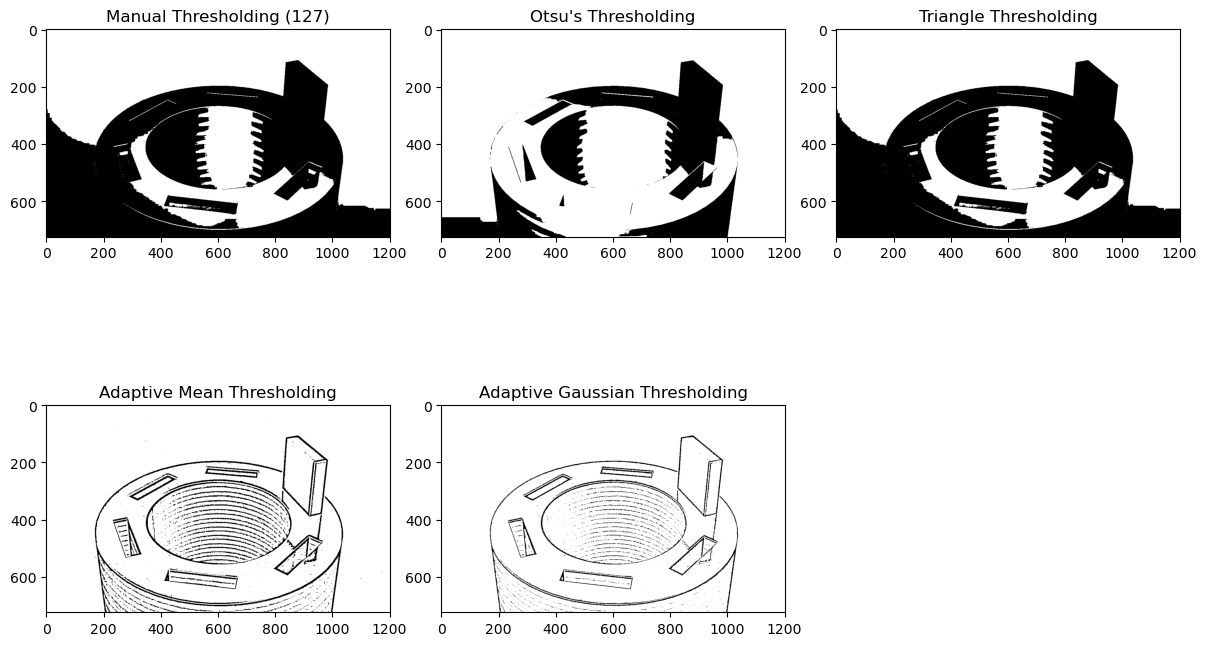

Otsu's Threshold Value: 106.0000
Triangle Threshold Value: 127.0000
Structural Similarity Index (SSIM): 0.8753
Threshold for SSIM classification: 0.8739
Current SSIM Threshold for misfit-3_1.png: 0.8739
Surface Roughness (Std Dev): 18.5573
Linear Correlation (Pearson): 0.6448
Non-linear Correlation (Spearman): 0.8198
Magnet Insertion Percentage: 3.58%
Alignment Score: 87.53%
Decision: Assembly issue detected (low SSIM and magnet not fully inserted).


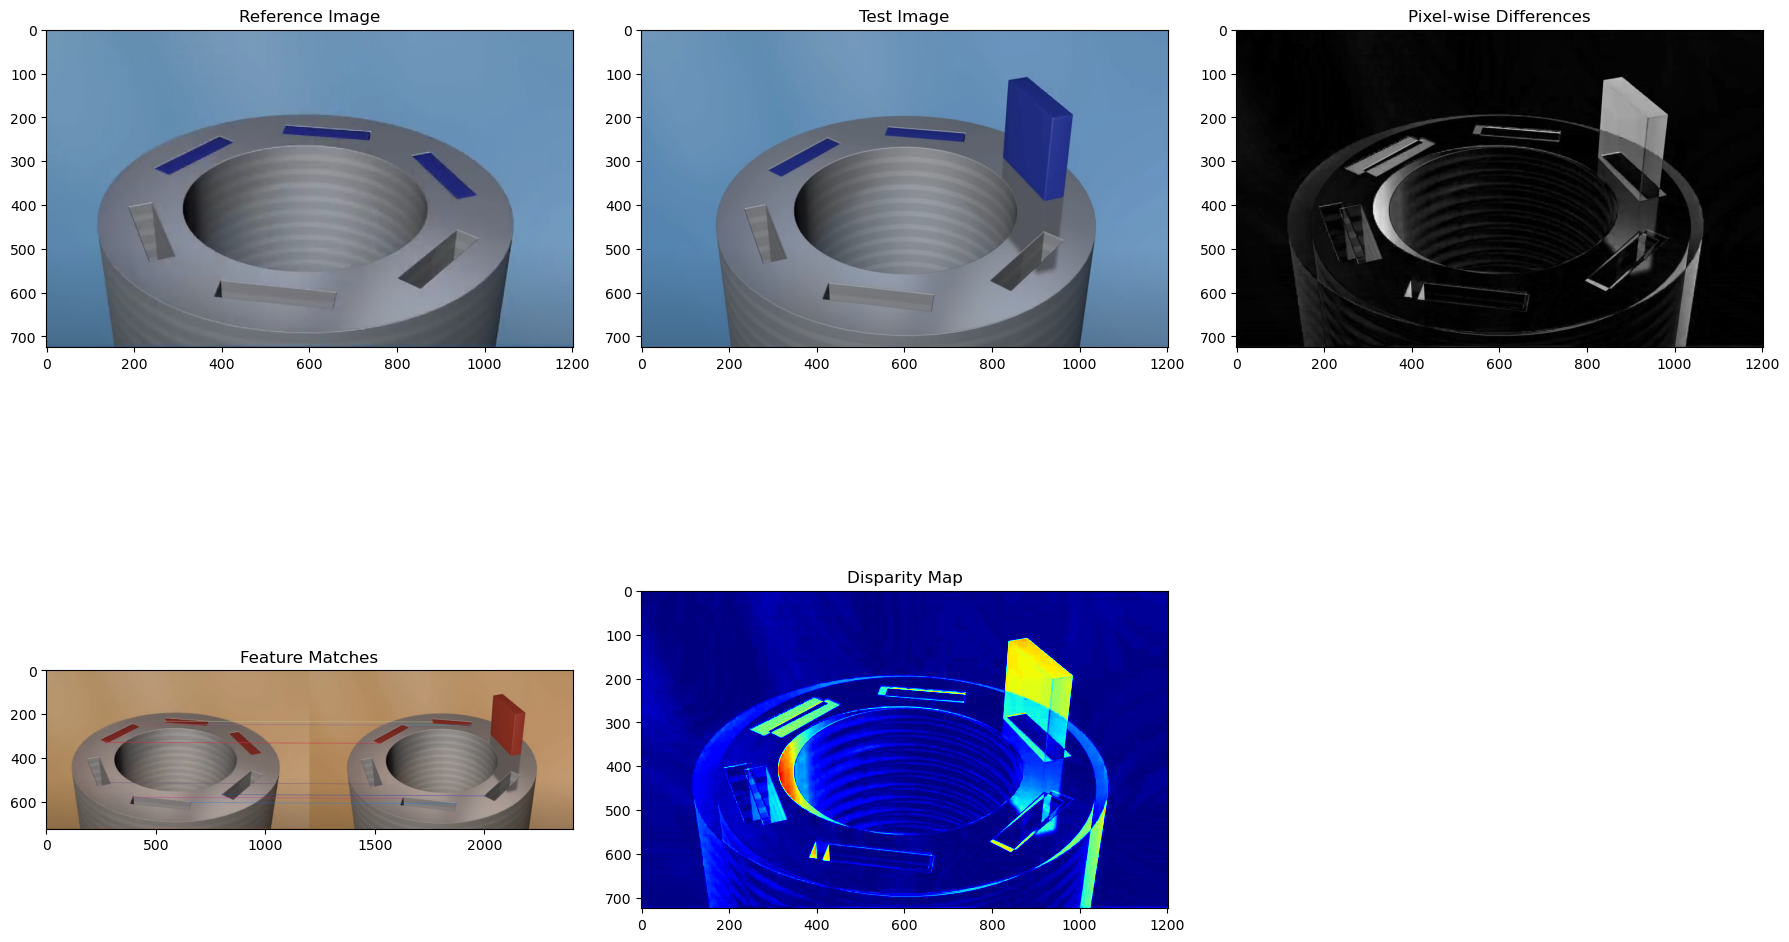


Processing: misfit-3_2.png
Percentage of Thresholded Pixels (Adaptive Gaussian): 95.24%


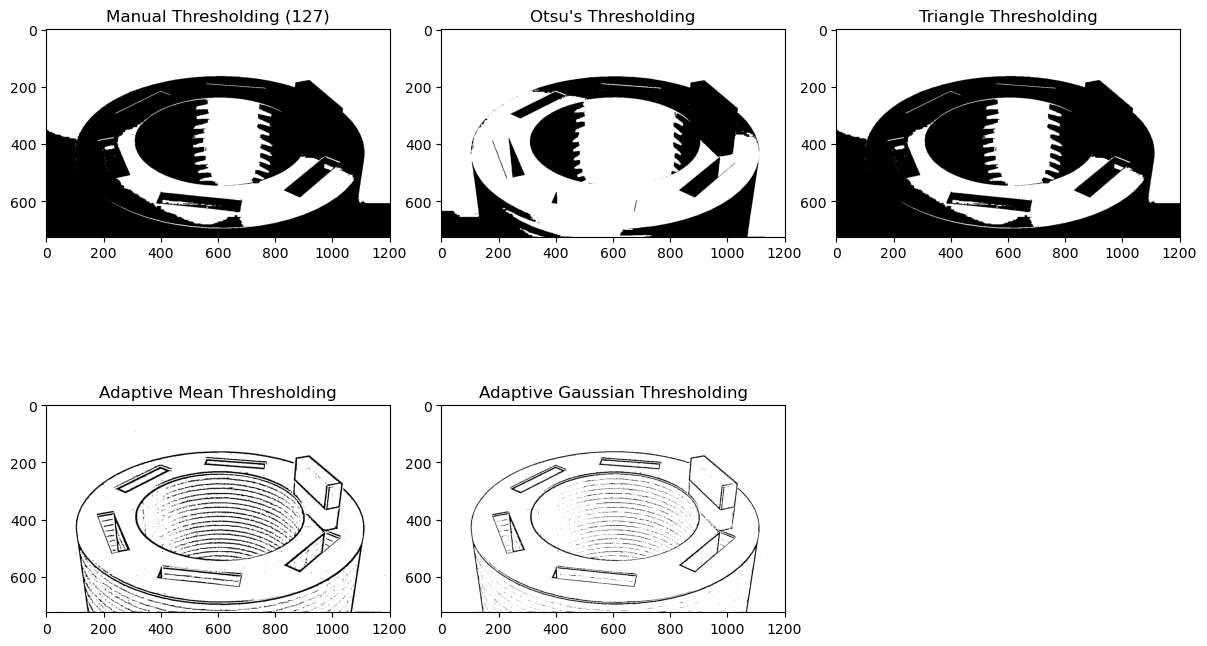

Otsu's Threshold Value: 107.0000
Triangle Threshold Value: 127.0000
Structural Similarity Index (SSIM): 0.8669
Threshold for SSIM classification: 0.8734
Current SSIM Threshold for misfit-3_2.png: 0.8734
Surface Roughness (Std Dev): 18.5188
Linear Correlation (Pearson): 0.6241
Non-linear Correlation (Spearman): 0.7509
Magnet Insertion Percentage: 3.01%
Alignment Score: 86.69%
Decision: Assembly issue detected (low SSIM and magnet not fully inserted).


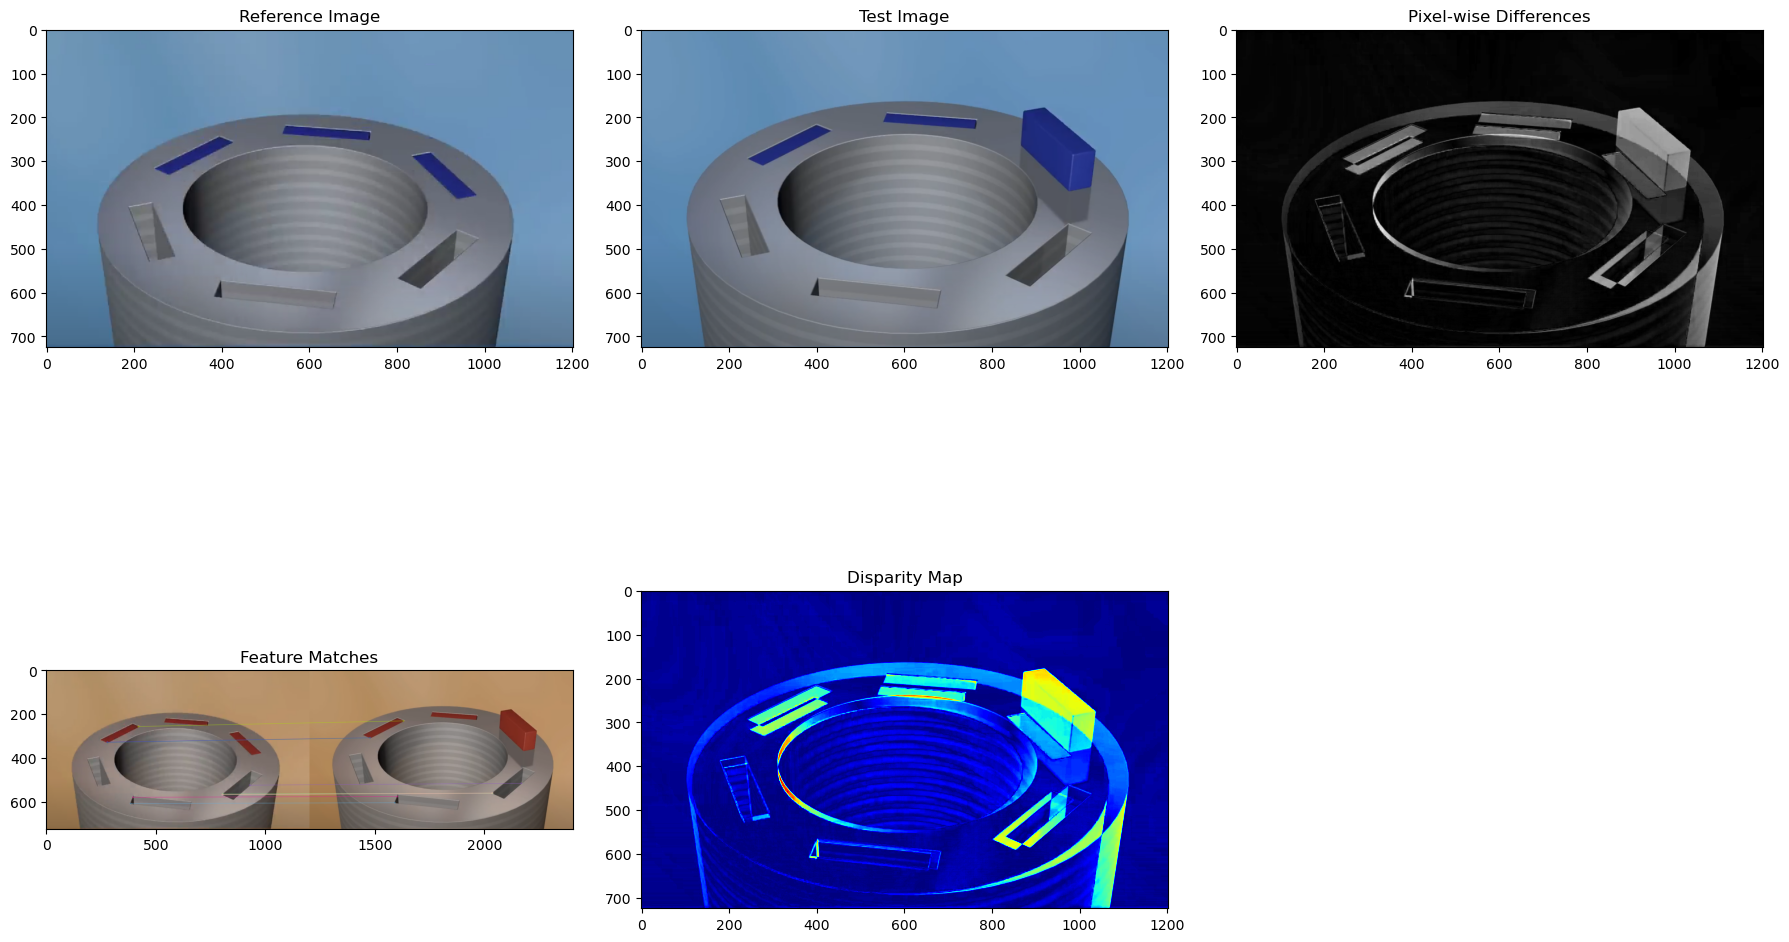


Processing: misfit-3_3.png
Percentage of Thresholded Pixels (Adaptive Gaussian): 95.39%


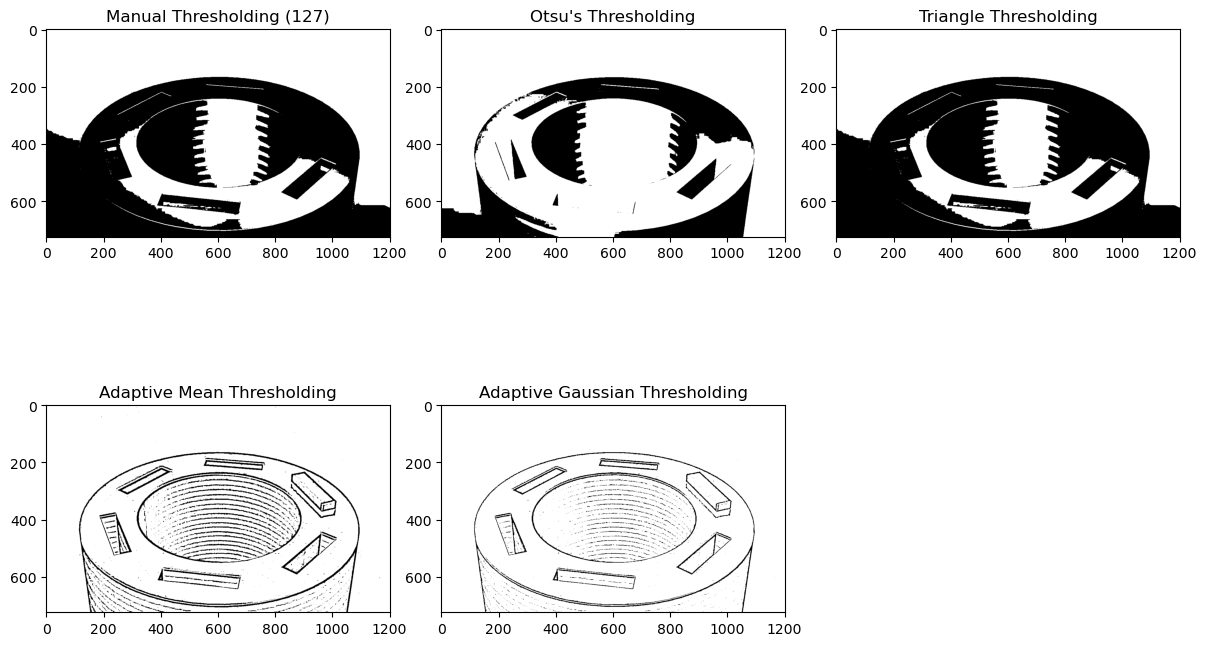

Otsu's Threshold Value: 109.0000
Triangle Threshold Value: 127.0000
Structural Similarity Index (SSIM): 0.8765
Threshold for SSIM classification: 0.8752
Current SSIM Threshold for misfit-3_3.png: 0.8752
Surface Roughness (Std Dev): 15.4731
Linear Correlation (Pearson): 0.7213
Non-linear Correlation (Spearman): 0.8049
Magnet Insertion Percentage: 2.40%
Alignment Score: 87.65%
Decision: Assembly issue detected (low SSIM and magnet not fully inserted).


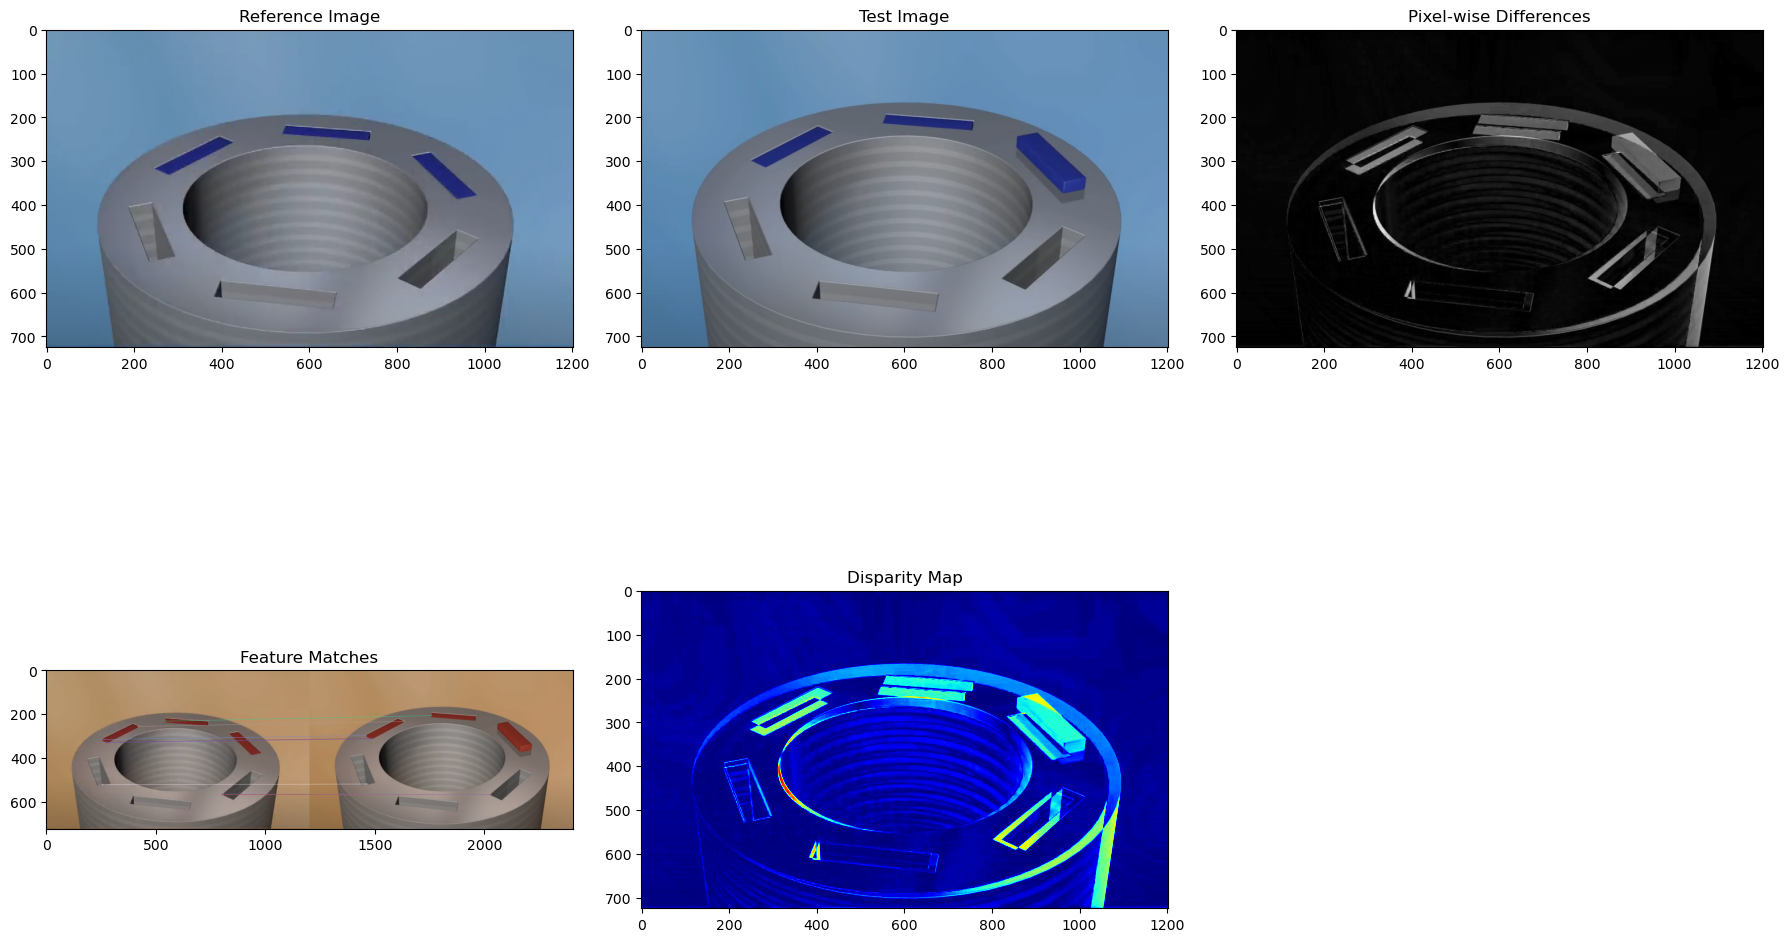


Processing: new magnet-proper.jpg
Percentage of Thresholded Pixels (Adaptive Gaussian): 89.51%


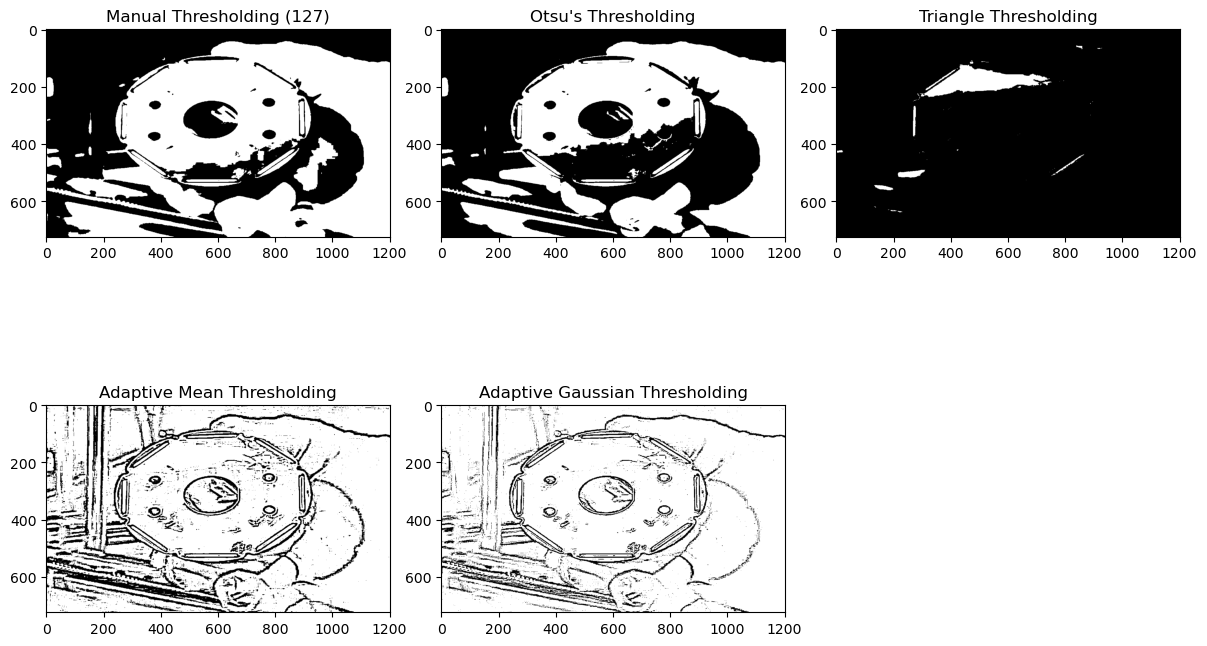

Otsu's Threshold Value: 143.0000
Triangle Threshold Value: 248.0000
Structural Similarity Index (SSIM): 0.6565
Threshold for SSIM classification: 0.9116
Current SSIM Threshold for new magnet-proper.jpg: 0.9116
Surface Roughness (Std Dev): 35.9147
Linear Correlation (Pearson): -0.1048
Non-linear Correlation (Spearman): -0.0756
Magnet Insertion Percentage: 2.36%
Alignment Score: 65.65%
Decision: Assembly issue detected (low SSIM and magnet not fully inserted).


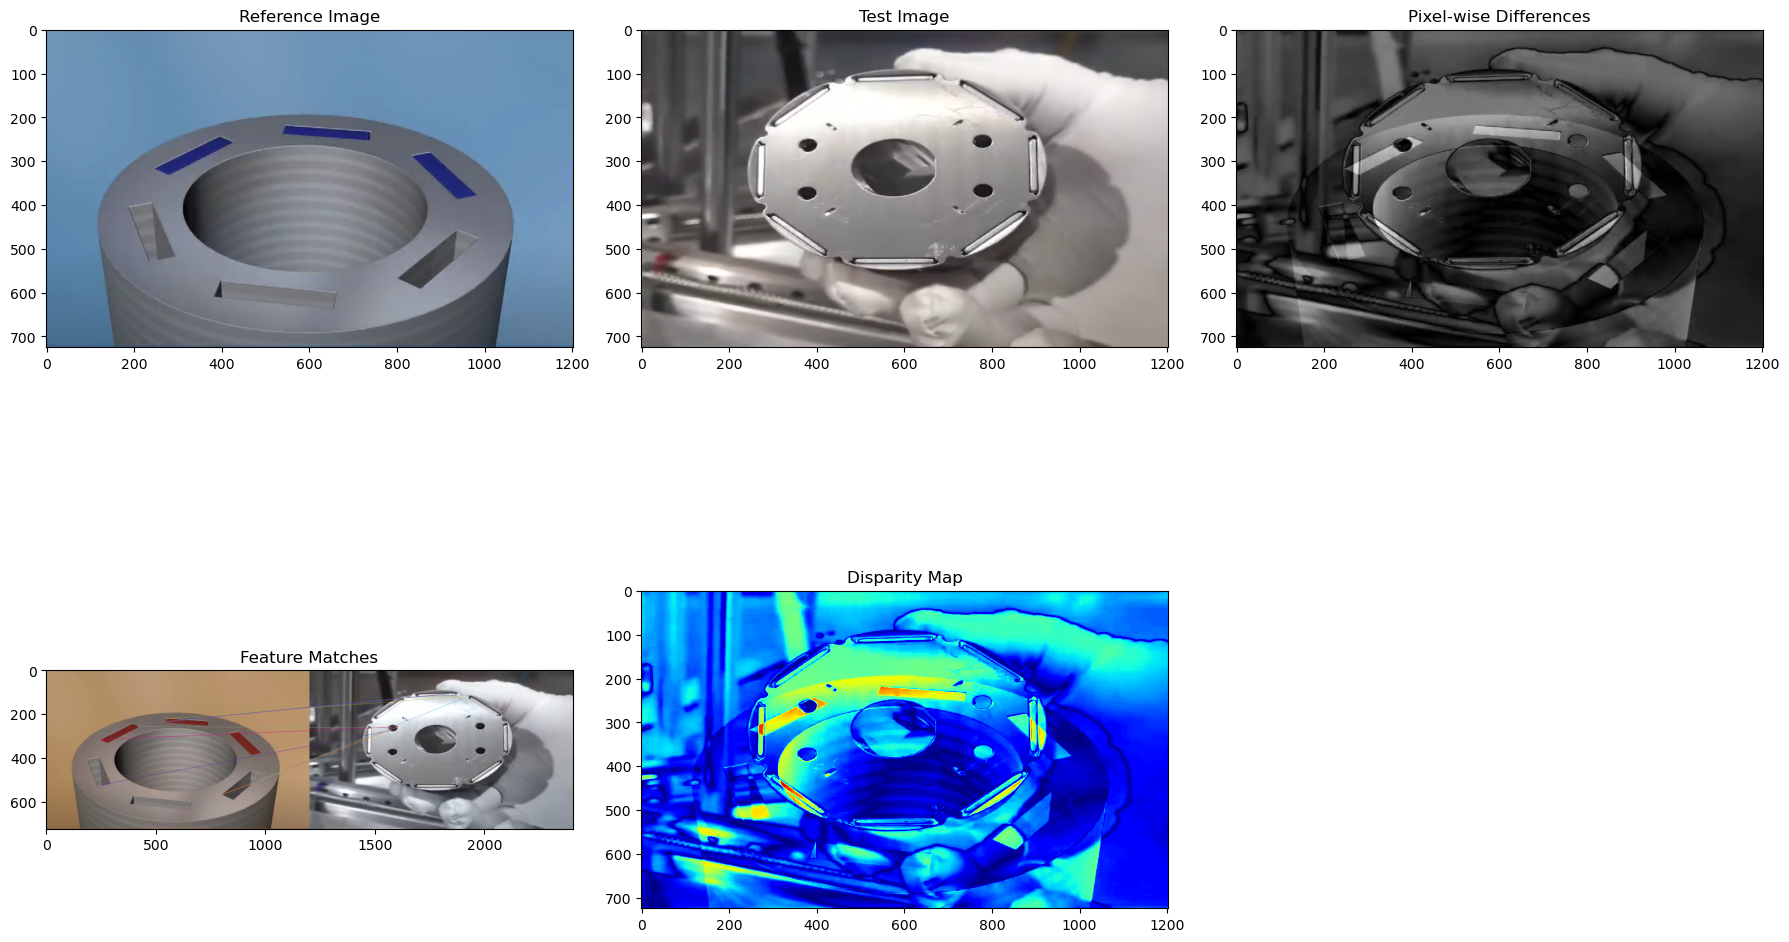


Processing: new magnet_empty slots.jpg
Percentage of Thresholded Pixels (Adaptive Gaussian): 89.83%


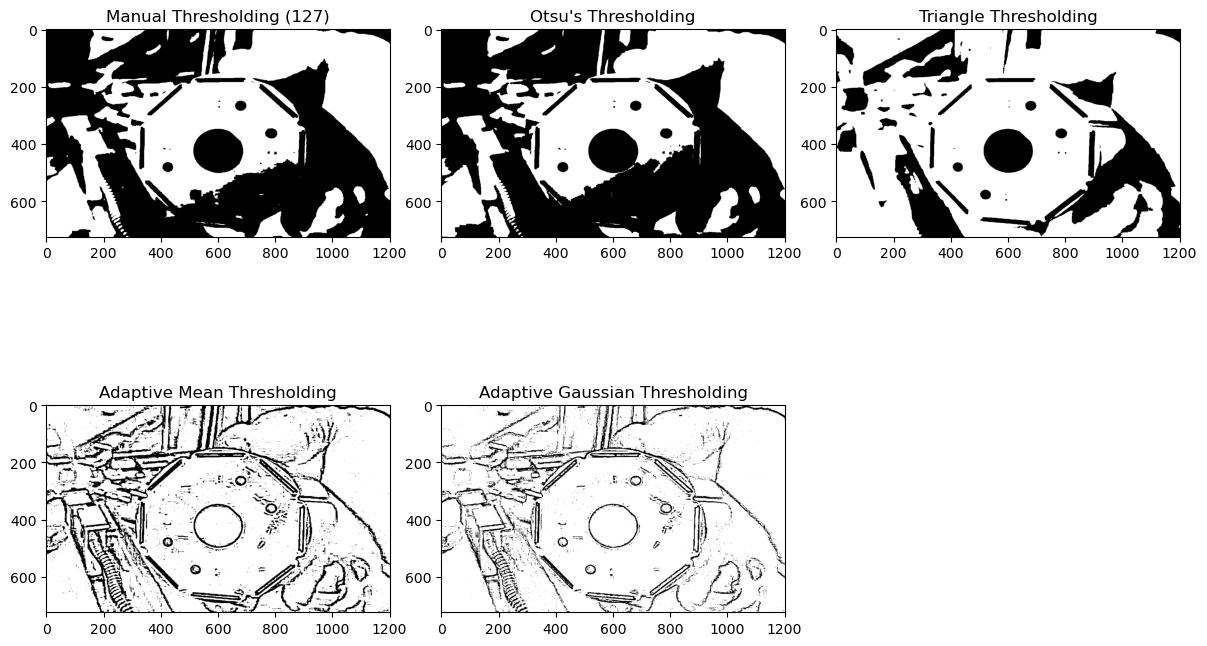

Otsu's Threshold Value: 134.0000
Triangle Threshold Value: 83.0000
Structural Similarity Index (SSIM): 0.6597
Threshold for SSIM classification: 0.9086
Current SSIM Threshold for new magnet_empty slots.jpg: 0.9086
Surface Roughness (Std Dev): 36.4679
Linear Correlation (Pearson): -0.1065
Non-linear Correlation (Spearman): -0.0888
Magnet Insertion Percentage: 6.89%
Alignment Score: 65.97%
Decision: Assembly issue detected (low SSIM and magnet not fully inserted).


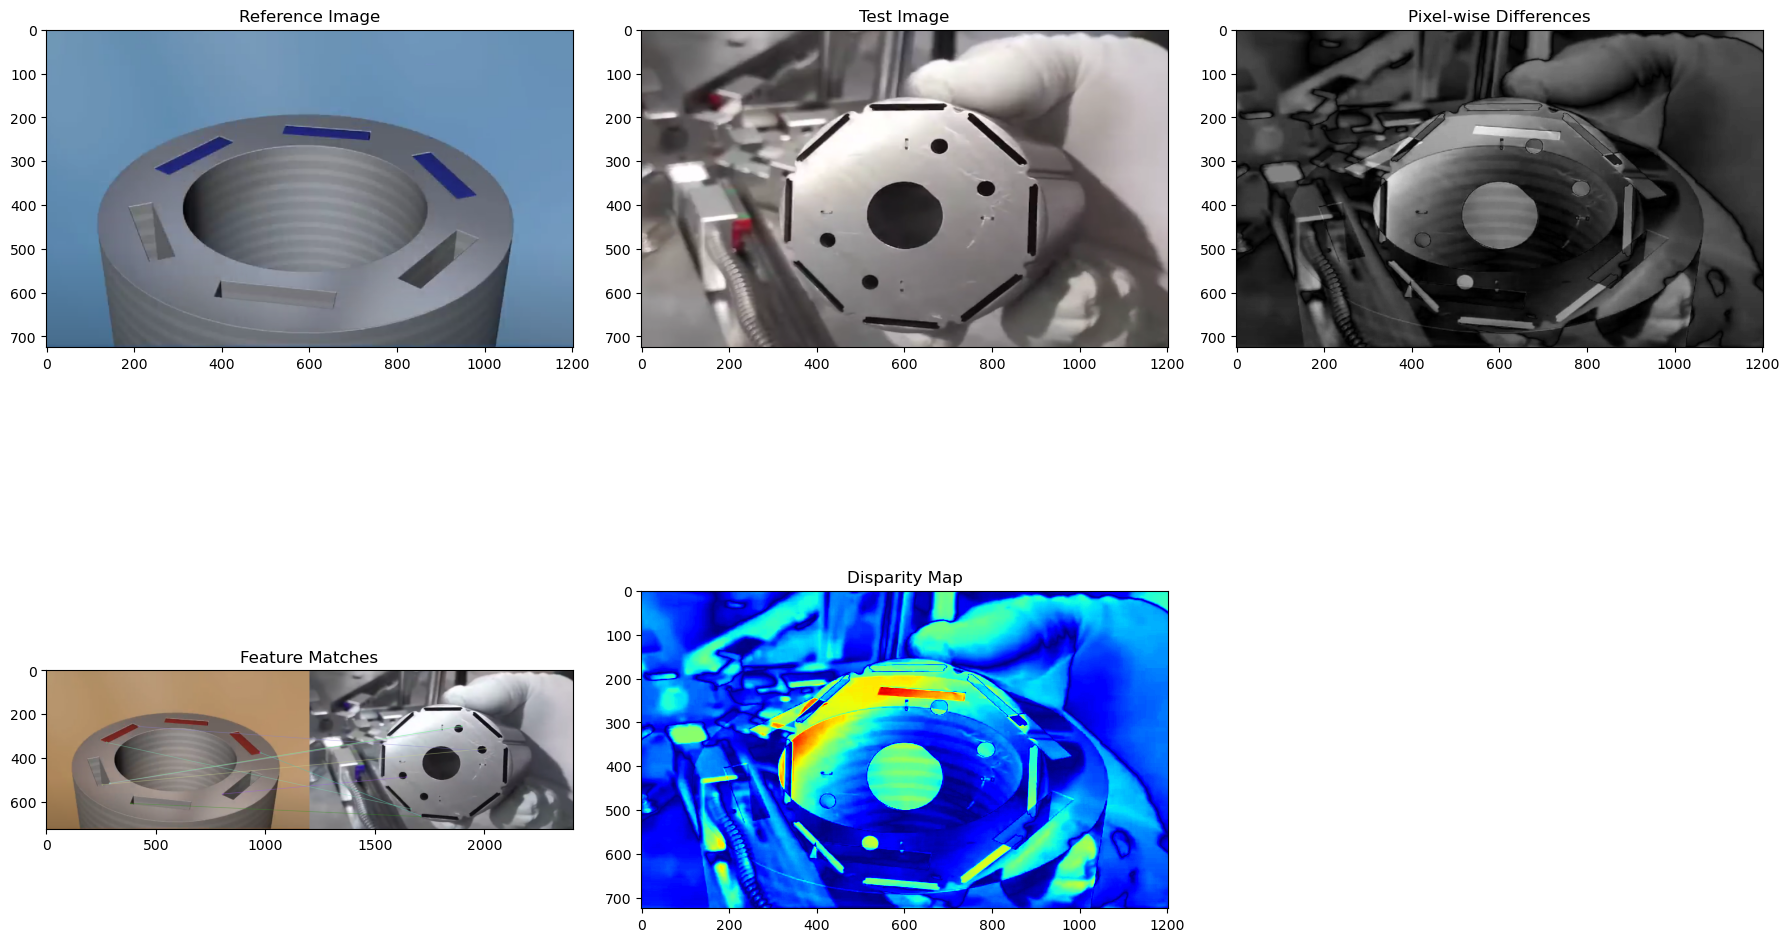

Threshold for SSIM classification: 0.9086
Threshold SSIM: 0.9960
GMM-based threshold: 0.7629


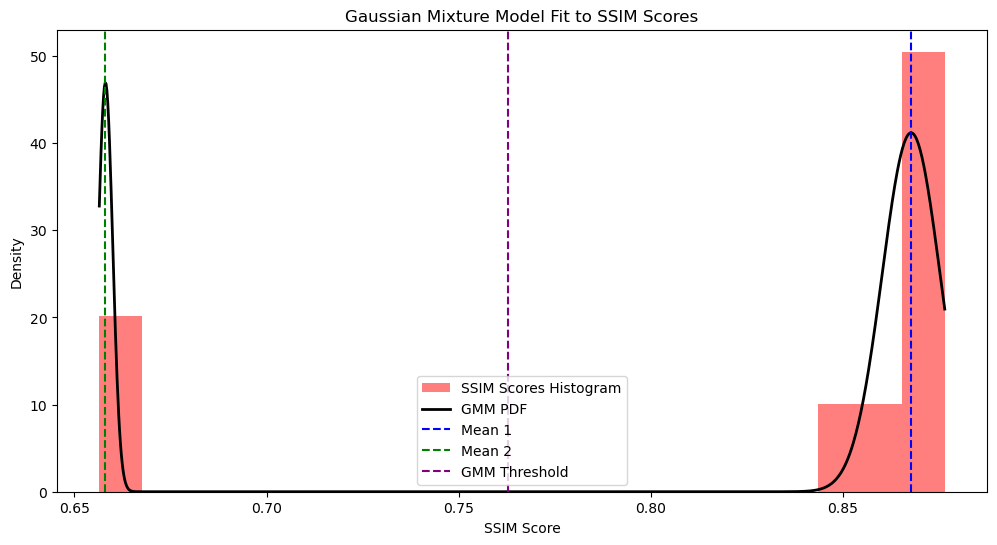

Structural Similarity Index (SSIM): 1.0000


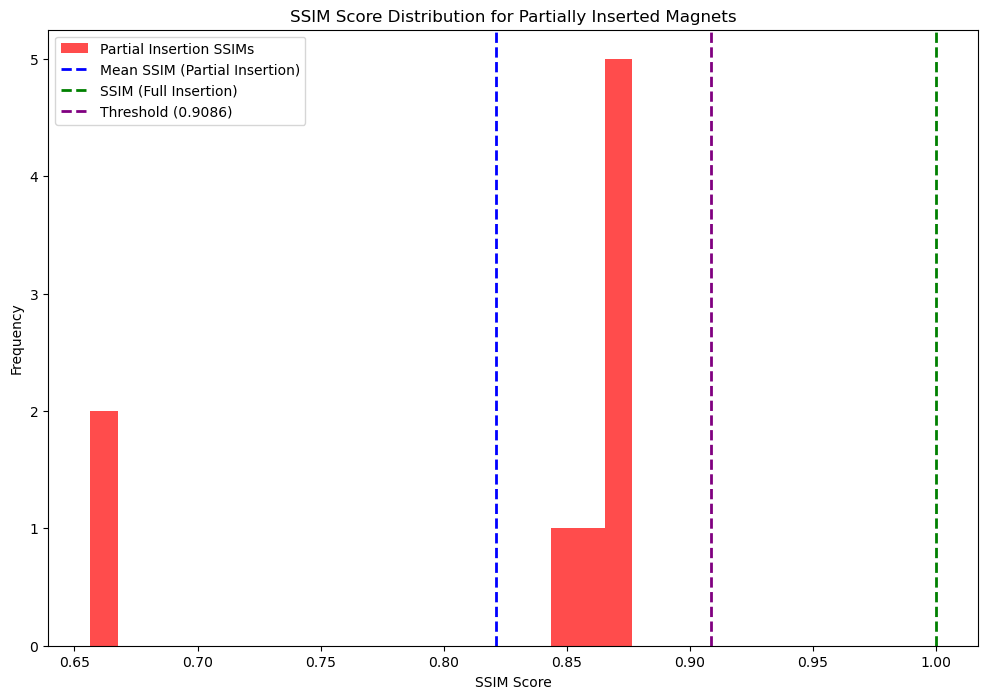

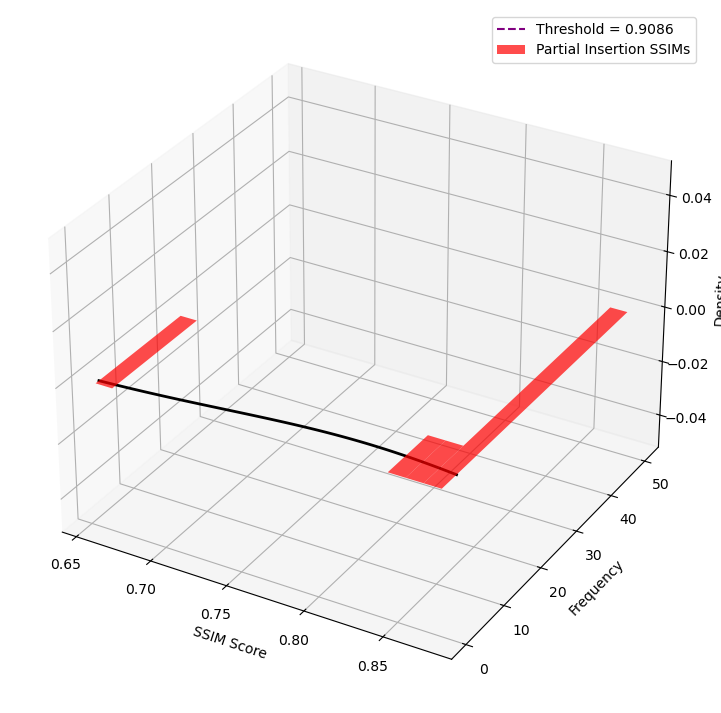

SSIM score for fully inserted magnet: 1.0000
The SSIM score for the fully inserted magnet falls above the threshold.


In [1]:
import os
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.mixture import GaussianMixture
from scipy.stats import pearsonr, spearmanr

# Load and preprocess images
def load_and_preprocess_images(ref_path, test_path):
    ref_image = cv2.imread(ref_path)
    test_image = cv2.imread(test_path)
    if ref_image is None or test_image is None:
        raise ValueError(f"Error: Unable to load images from {ref_path} or {test_path}.")
    
    # Resize test image to match reference image dimensions
    test_image_resized = cv2.resize(test_image, (ref_image.shape[1], ref_image.shape[0]))
    
    # Convert to grayscale
    ref_gray = cv2.cvtColor(ref_image, cv2.COLOR_BGR2GRAY)
    test_gray = cv2.cvtColor(test_image_resized, cv2.COLOR_BGR2GRAY)
    
    return ref_image, test_image_resized, ref_gray, test_gray

# Compare images using SSIM and pixel-wise differences
def compare_images(ref_gray, test_gray):
    # Measure SSIM
    similarity_index, _ = ssim(ref_gray, test_gray, full=True)
    print(f'Structural Similarity Index (SSIM): {similarity_index:.4f}')
    
    # Calculate pixel-wise differences
    diff_image = cv2.absdiff(ref_gray, test_gray)
    diff_image_normalized = cv2.normalize(diff_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    
    return diff_image_normalized, similarity_index

# Thresholding functions for global and adaptive thresholds
def apply_thresholds(image):
    # Global Thresholding (Manual)
    _, manual_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    
    # Otsu's Thresholding
    _, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Triangle Thresholding
    _, triangle_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_TRIANGLE)
    
    # Adaptive Mean Thresholding
    adaptive_mean_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
    
    # Adaptive Gaussian Thresholding
    adaptive_gauss_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    
    # Calculate percentage of thresholded pixels for Adaptive Gaussian
    total_pixels = adaptive_gauss_thresh.size
    thresholded_pixels = np.sum(adaptive_gauss_thresh == 255)
    percentage_thresholded = (thresholded_pixels / total_pixels) * 100
    
    print(f"Percentage of Thresholded Pixels (Adaptive Gaussian): {percentage_thresholded:.2f}%")
    
    return manual_thresh, otsu_thresh, triangle_thresh, adaptive_mean_thresh, adaptive_gauss_thresh

# Display threshold images with titles
def display_thresholds(images, titles):
    plt.figure(figsize=(12, 8))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(2, 3, i + 1)
        plt.title(title)
        plt.imshow(img, cmap='gray')
    plt.tight_layout()
    plt.show()

# Calculate SSIM threshold using statistical method (mean + std deviation)
def determine_ssim_threshold(ssim_scores):
    mean_ssim = np.mean(ssim_scores)
    std_ssim = np.std(ssim_scores)
    
    # Using mean + standard deviation as threshold
    threshold = mean_ssim + std_ssim
    print(f"Threshold for SSIM classification: {threshold:.4f}")
    return threshold

# Calculate threshold using mean + 2 * std
def calculate_threshold(ssim_scores):
    mean_ssim = np.mean(ssim_scores)
    std_ssim = np.std(ssim_scores)
    threshold = mean_ssim + 2 * std_ssim
    print(f'Threshold SSIM: {threshold:.4f}')
    return threshold

# Gaussian Mixture Model for determining threshold
def gmm_threshold(ssim_scores):
    # Fit a Gaussian Mixture Model (GMM) to the SSIM scores
    gmm = GaussianMixture(n_components=2, random_state=42)
    gmm.fit(np.array(ssim_scores).reshape(-1, 1))
    
    # Get means of the two components and calculate threshold as the mean between the two
    means = gmm.means_.flatten()
    threshold = np.mean(means)
    
    print(f"GMM-based threshold: {threshold:.4f}")
    return threshold, means, gmm

# Visualize GMM Fit
def visualize_gmm(ssim_scores, gmm_model):
    x = np.linspace(min(ssim_scores), max(ssim_scores), 1000).reshape(-1, 1)
    logprob = gmm_model.score_samples(x)
    pdf = np.exp(logprob)

    plt.figure(figsize=(12, 6))
    plt.hist(ssim_scores, bins=20, density=True, alpha=0.5, color='red', label='SSIM Scores Histogram')
    plt.plot(x, pdf, '-k', linewidth=2, label='GMM PDF')
    plt.axvline(gmm_model.means_[0], color='blue', linestyle='--', label='Mean 1')
    plt.axvline(gmm_model.means_[1], color='green', linestyle='--', label='Mean 2')
    plt.axvline(np.mean(gmm_model.means_), color='purple', linestyle='--', label='GMM Threshold')

    plt.title('Gaussian Mixture Model Fit to SSIM Scores')
    plt.xlabel('SSIM Score')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Visualize the SSIM score distribution
def visualize_ssim_distribution(partial_ssim_scores, full_ssim_score, threshold=None):
    plt.figure(figsize=(12, 8))
    plt.hist(partial_ssim_scores, bins=20, alpha=0.7, label="Partial Insertion SSIMs", color='red')
    plt.axvline(np.mean(partial_ssim_scores), color='blue', linestyle='dashed', linewidth=2, label="Mean SSIM (Partial Insertion)")
    plt.axvline(full_ssim_score, color='green', linestyle='dashed', linewidth=2, label="SSIM (Full Insertion)")
    if threshold is not None:
        plt.axvline(threshold, color='purple', linestyle='dashed', linewidth=2, label=f"Threshold ({threshold:.4f})")
    plt.legend()
    plt.title('SSIM Score Distribution for Partially Inserted Magnets')
    plt.xlabel('SSIM Score')
    plt.ylabel('Frequency')
    plt.show()

    # 3D Histogram
    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111, projection='3d')
    hist, bins = np.histogram(partial_ssim_scores, bins=20, density=True)
    bin_centers = (bins[:-1] + bins[1:]) / 2

    ax.bar(bin_centers, hist, width=bins[1] - bins[0], alpha=0.7, color='red', label='Partial Insertion SSIMs')

    mu, std = norm.fit(partial_ssim_scores)
    x = np.linspace(min(partial_ssim_scores), max(partial_ssim_scores), 100)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, 'k', linewidth=2)

    if threshold is not None:
        ax.axvline(x=threshold, color='purple', linestyle='--', label=f'Threshold = {threshold:.4f}')

    ax.set_xlabel('SSIM Score')
    ax.set_ylabel('Frequency')
    ax.set_zlabel('Density')
    ax.legend()
    plt.show()

# Surface roughness analysis
def analyze_surface(depth_map):
    surface_roughness = np.std(depth_map)
    print(f'Surface Roughness (Std Dev): {surface_roughness:.4f}')
    return surface_roughness

# Feature matching
def feature_matching(ref_gray, test_gray):
    orb = cv2.ORB_create()
    keypoints_ref, descriptors_ref = orb.detectAndCompute(ref_gray, None)
    keypoints_test, descriptors_test = orb.detectAndCompute(test_gray, None)
    bf_matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf_matcher.match(descriptors_ref, descriptors_test)
    matches = sorted(matches, key=lambda x: x.distance)
    return matches, keypoints_ref, keypoints_test

# Depth analysis
def depth_analysis(ref_gray, test_gray):
    disparity_map = cv2.absdiff(ref_gray, test_gray)
    return disparity_map

# Calculate correlation metrics (Linear and Non-Linear)
def calculate_correlation(ref_gray, test_gray):
    ref_flat = ref_gray.flatten()
    test_flat = test_gray.flatten()
    
    # Pearson (Linear Correlation)
    linear_corr, _ = pearsonr(ref_flat, test_flat)
    # Spearman (Non-linear Correlation)
    nonlinear_corr, _ = spearmanr(ref_flat, test_flat)
    
    print(f'Linear Correlation (Pearson): {linear_corr:.4f}')
    print(f'Non-linear Correlation (Spearman): {nonlinear_corr:.4f}')
    
    return linear_corr, nonlinear_corr

# Magnet insertion percentage
def determine_magnet_insertion(test_gray):
    threshold = 50  # Threshold to identify inserted magnets
    inserted_pixels = np.sum(test_gray < threshold)
    total_pixels = test_gray.size
    insertion_percentage = (inserted_pixels / total_pixels) * 100
    print(f'Magnet Insertion Percentage: {insertion_percentage:.2f}%')
    return insertion_percentage

# Calculate alignment score
def calculate_alignment_score(ssim_index):
    alignment_score = ssim_index * 100
    print(f'Alignment Score: {alignment_score:.2f}%')
    return alignment_score

# Decision-making system
def decision_making(ssim_index, insertion_percentage, surface_roughness):
    threshold_ssim = 0.9
    threshold_insertion = 95.0
    threshold_roughness = 0.5
    
    if ssim_index < threshold_ssim and insertion_percentage < threshold_insertion:
        print("Decision: Assembly issue detected (low SSIM and magnet not fully inserted).")
    elif ssim_index < threshold_ssim:
        print("Decision: Assembly issue detected (low SSIM).")
    elif insertion_percentage < threshold_insertion:
        print("Decision: Magnet not fully inserted.")
    elif surface_roughness > threshold_roughness:
        print("Decision: Surface quality issue detected (high surface roughness).")
    else:
        print("Decision: Assembly is acceptable.")

# Main execution function
def main():
    ref_path = 'magnet_insertion-proper.jpg'  # Path to the fully inserted magnet image
    input_folder = 'new_images'  # Folder containing test images (partially inserted magnets)
    
    # Lists to store SSIM scores
    full_insertion_ssims = []
    partial_insertion_ssims = []
    
    # Get list of images in the input folder
    test_images = [f for f in os.listdir(input_folder) if f.endswith(('.jpg', '.png'))]
    
    # Process each image
    for test_image_name in test_images:
        test_path = os.path.join(input_folder, test_image_name)
        print(f"\nProcessing: {test_image_name}")

         # Load and preprocess images
        ref_image, test_image, ref_gray, test_gray = load_and_preprocess_images(ref_path, test_path)
        
        # Apply thresholding techniques
        manual_thresh, otsu_thresh, triangle_thresh, adaptive_mean_thresh, adaptive_gauss_thresh = apply_thresholds(test_gray)
        
        # Display thresholded images
        titles = ['Manual Thresholding (127)', 'Otsu\'s Thresholding', 'Triangle Thresholding', 
                  'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
        display_thresholds([manual_thresh, otsu_thresh, triangle_thresh, adaptive_mean_thresh, adaptive_gauss_thresh], titles)

        # Show threshold values for Otsu and Triangle
        print(f"Otsu's Threshold Value: {cv2.threshold(test_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[0]:.4f}")
        print(f"Triangle Threshold Value: {cv2.threshold(test_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_TRIANGLE)[0]:.4f}")
        
        # Compare images
        diff_image, ssim_index = compare_images(ref_gray, test_gray)
        
        # Collect SSIM score for further analysis
        if 'full' in test_image_name.lower():
            full_insertion_ssims.append(ssim_index)
        else:
            partial_insertion_ssims.append(ssim_index)
        
        # Calculate and display the threshold for the current image
        current_threshold = determine_ssim_threshold(partial_insertion_ssims)
        print(f"Current SSIM Threshold for {test_image_name}: {current_threshold:.4f}")
        
        # Feature matching
        matches, keypoints_ref, keypoints_test = feature_matching(ref_gray, test_gray)
        
        # Depth analysis
        disparity_map = depth_analysis(ref_gray, test_gray)
        
        # Surface roughness analysis
        surface_roughness = analyze_surface(disparity_map)
        
        # Linear and Non-linear Correlation
        linear_corr, nonlinear_corr = calculate_correlation(ref_gray, test_gray)
        
        # Magnet insertion percentage
        insertion_percentage = determine_magnet_insertion(test_gray)
        
        # Alignment score
        alignment_score = calculate_alignment_score(ssim_index)
        
        # Decision-making
        decision_making(ssim_index, insertion_percentage, surface_roughness)
        
        # Visualize results with larger images
        plt.figure(figsize=(18, 12))  # Larger figure for better visibility
        plt.subplot(2, 3, 1)
        plt.title('Reference Image')
        plt.imshow(cv2.cvtColor(ref_image, cv2.COLOR_BGR2RGB))
        plt.subplot(2, 3, 2)
        plt.title('Test Image')
        plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
        plt.subplot(2, 3, 3)
        plt.title('Pixel-wise Differences')
        plt.imshow(diff_image, cmap='gray')
        matched_image = cv2.drawMatches(ref_image, keypoints_ref, test_image, keypoints_test, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
        plt.subplot(2, 3, 4)
        plt.title('Feature Matches')
        plt.imshow(matched_image)
        plt.subplot(2, 3, 5)
        plt.title('Disparity Map')
        plt.imshow(disparity_map, cmap='jet')
        plt.tight_layout()
        plt.show()

    # Determine the threshold for SSIM classification
    ssim_threshold = determine_ssim_threshold(partial_insertion_ssims)
    threshold_mean_plus_2_std = calculate_threshold(partial_insertion_ssims)
    gmm_threshold_value, _, gmm_model = gmm_threshold(partial_insertion_ssims)

    # Visualize GMM Fit
    visualize_gmm(partial_insertion_ssims, gmm_model)

    # Compute SSIM score for fully inserted magnet (reference image)
    fully_inserted_image = load_and_preprocess_images(ref_path, ref_path)[2]
    full_ssim_score = compare_images(fully_inserted_image, fully_inserted_image)[1]
    
    # Visualize SSIM score distribution
    visualize_ssim_distribution(partial_insertion_ssims, full_ssim_score, threshold=ssim_threshold)
    
    print(f"SSIM score for fully inserted magnet: {full_ssim_score:.4f}")
    print(f"The SSIM score for the fully inserted magnet falls {'above' if full_ssim_score > ssim_threshold else 'below'} the threshold.")

if __name__ == "__main__":
    main()
